<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-описание" data-toc-modified-id="Цели-и-описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и описание</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-типов" data-toc-modified-id="Преобразование-типов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование типов</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Расчеты" data-toc-modified-id="Расчеты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Расчеты</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Тариф-Smart" data-toc-modified-id="Тариф-Smart-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тариф Smart</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тариф-Ultra" data-toc-modified-id="Тариф-Ultra-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Тариф Ultra</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Сравнение-тарифов" data-toc-modified-id="Сравнение-тарифов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение тарифов</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Выручка-по-тарифам" data-toc-modified-id="Выручка-по-тарифам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выручка по тарифам</a></span></li><li><span><a href="#Выручка-по-регионам" data-toc-modified-id="Выручка-по-регионам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выручка по регионам</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

## Цели и описание

Заказчик - федеральный оператор сотовой связи. Нужно скорректировать рекламный бюджет на основании того, какой тариф приносит больше денег.  
Предоставлена выборка данных об активности 500 пользователей оператора за год, требуется проанализировать их поведение и сделать вывод, какой тариф перспективнее.  
В ходе исследования проверим две основные гипотезы:  
- средняя выручка от пользователей тарифов "Ультра" и "Смарт" различается;
- средняя выручка от пользователей из Москвы отличается от выручки по другим регионам.

### Обзор данных

Импорт библиотек:

In [74]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as st
import datetime as dt
import seaborn as sns

Распаковка файла:

In [75]:
# альтернативные пути для локальной работы
try:
    users = pd.read_csv('/datasets/users.csv')
except:
    users = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_4_tariff_research\users.csv')
    
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    tariffs = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_4_tariff_research\tariffs.csv')

try:
    calls = pd.read_csv('/datasets/calls.csv')
except:
    calls = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_4_tariff_research\calls.csv')
    
try:
    internet = pd.read_csv('/datasets/internet.csv')
except:
    internet = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_4_tariff_research\internet.csv')
    
try:
    messages = pd.read_csv('/datasets/messages.csv')
except:
    messages = pd.read_csv(r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_4_tariff_research\messages.csv')

Откроем отдельно таблицу с тарифами:

In [76]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [77]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице всего две строки с необходимыми для исследования тарифами. Использован целочисленный тип данных, кроме названия тарифа, поэтому преобразование не требуется.

Выведем информацию о других доступных таблицах:

In [78]:
def prep(data):
    """
    Функция для вывода обзорной информации о данных.  
    
    Принимает на вход датасет, выводит первые 10 строк, предоставляет информацию о количестве строк и типах данных.
    Делает первичную проверку на наличие пропусков и дубликатов.
    
    """
    display(data.head(10))
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Общая информация')
    print(data.info())
    print('-------------------------------------------------------------------------------------------------------------------')
    print(data.describe())
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Количество пропусков')
    print(data.isna().sum())
    print('Количество дублирующихся строк', data.duplicated().sum())


list_of_data = [users,calls,messages,internet]

for df in list_of_data:
    prep(df)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
-------------------------------------------------------------------------------------------------------------------
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
-------------------------------------------------------------------------------------------------------------------
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
----

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
-------------------------------------------------------------------------------------------------------------------
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
-------------------------------------------------------------------------------------------------------------------
Количество пропусков
id              0
message_date    0
user_id  

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


-------------------------------------------------------------------------------------------------------------------
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
-------------------------------------------------------------------------------------------------------------------
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     373

В каждой из остальных таблиц присутствует уникальный `user_id`, но в таблицах по отдельным видам услуг также указаны id конкретных сессий. Исходя из задачи, потребуется подсчет общего количества совершенных конкретным пользователем звонков, отправленных сообщений и израсходованного траффика, поэтому имеет смысл сгруппировать таблицы с услугами по конкретному пользователю, а затем объединить в одну сводную.

## Предобработка данных

### Преобразование типов

Во избежание проблем при объединении таблиц сначала обработаем каждую по отдельности, проверим на ошибки и преобразуем типы данных при необходимости.  
Каждая из таблиц по отдельному виду услуг содержит столбец с названием `id`. Переименуем эти столбцы сразу для удобства идентификации в дальнейшем.

Пользователи:

In [79]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Преобразуем столбцы, содержащие даты, в datetime:

In [80]:
users[['churn_date','reg_date']] = users[['churn_date','reg_date']].apply(pd.to_datetime)

В столбце `churn_date` в основном не указаны значения, но это не ошибка, т.к. это означает, что тариф использовался на момент выгрузки. Пропуски дат не должны помешать при дальнейшей обработке данных, поэтому оставим их в первозданном виде.

Звонки:

In [81]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Приведем значения к нужному типу и переименуем столбцы. Длительность звонков нужно округлить до минут, поскольку так заданы условия тарифов.

In [82]:
calls['call_date'] = pd.to_datetime(calls['call_date']) # преобразуем даты

# добавлен try..except, т.к. если повторно запускать код без очистки ядра или выполнять ячейки не по порядку,
# появится ошибка из-за попытки обращения к несуществующему имени
try:
    calls['id'] = calls['id'].astype('int') # приведем id к целочисленному типу
except:
    print('column was renamed')
    
calls['duration'] = calls['duration'].apply(np.ceil) # округляем вверх, исходя из вводных "секунды округляются до минут"
calls = calls.rename(columns={'id':'call_id'}) # переименовываем столбцы
calls.head()

,call_id,call_date,duration,user_id
0,10000,2018-07-25,0.0,1000
1,10001,2018-08-17,0.0,1000
2,10002,2018-06-11,3.0,1000
3,10003,2018-09-21,14.0,1000
4,10004,2018-12-15,6.0,1000


Сообщения:

In [83]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Аналогично предыдущей таблице преобразуем типы и переименовываем столбцы

In [84]:
try:
    messages['id'] = messages['id'].astype('int')
except:
    print('column was renamed')
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages = messages.rename(columns={'id':'message_id'})
messages.head()

,message_id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000


Интернет:

In [85]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В списке есть дополнительная колонка без описания. Судя по первым строкам этой таблицы, там содержится порядковый номер, который не требуется, т.к. есть индекс. Удалим лишний столбец и добавим проверку:

In [86]:
try:
    internet = internet.drop('Unnamed: 0', axis=1)
except:
    print('column was removed')

Исходя из вводных "мегабайты округляются до гигабайт" округления до целых МБ недостаточно, поэтому потребуется сначала перевести в ГБ, а затем округлить вверх. Но переведем Мб в Гб после расчетов, когда получим конечное значение.

In [87]:
internet['session_date'] = pd.to_datetime(internet['session_date']) # преобразовываем даты
try:
    internet['id'] = internet['id'].astype('int') # преобразовываем id
except:
    print('column was renamed')
internet = internet.rename(columns={'id':'session_id'}) # переименовываем столбцы
internet.head()

,session_id,mb_used,session_date,user_id
0,10000,112.95,2018-11-25,1000
1,10001,1052.81,2018-09-07,1000
2,10002,1197.26,2018-06-25,1000
3,10003,550.27,2018-08-22,1000
4,10004,302.56,2018-09-24,1000


### Проверка дубликатов

Из предыдущего блока ясно, что пропущенных значений в таблицах нет. Проверим данные на наличие дубликатов.  
В таблице `users` могут быть дубликаты, например, из-за разного регистра в столбцах с именами и названиями населенных пунктов.

In [88]:
users['city'].unique() # выводим список уникальных значений городов

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Дублирующихся названий городов нет, но на всякий случай приведем к нижнему регистру столбцы с городами, именем и фамилией и проверим на дубликаты.

In [89]:
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()
users['city'] = users['city'].str.lower()
users.duplicated().sum()

0

### Объединение таблиц

Соберем все данные из разных таблиц в одну для того, чтобы можно было проводить с ними расчеты.  
Для этого сгруппируем каждую из таблиц с услугами по пользователям и по месяцам, т.к. данные предоставлены за один 2018 год, затем объединим услуги в одну общую таблицу. Далее объединим эти данные с данными пользователей и добавим данные по тарифам.

In [90]:
calls['month'] = calls['call_date'].dt.month # добавляем столбец с месяцем

calls_pivot = calls.pivot_table(index=['user_id', 'month'],
                                values='duration',
                                aggfunc=['sum', 'count']).reset_index()

calls_pivot.columns = ['user_id', 'month', 'duration', 'call_id'] #переименовываем столбцы
calls_pivot.head()

,user_id,month,duration,call_id
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


Аналогично поступаем с сообщениями:

In [91]:
messages['month'] = messages['message_date'].dt.month
# нужно только количество сообщений в месяц
messages_pivot = messages.pivot_table(index=['user_id','month'],
                                      values='message_id',
                                      aggfunc='count').reset_index()
messages_pivot.head()

,user_id,month,message_id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


И с траффиком:

In [92]:
internet['month'] = internet['session_date'].dt.month
# нужен только объем траффика в месяц
internet_pivot = internet.pivot_table(index=['user_id','month'],
                                      values='mb_used',
                                      aggfunc='sum').reset_index()
internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Объединяем все таблицы в одну:

In [93]:
# объединим таблицы по услугам в одну
services = calls_pivot.merge(messages_pivot, on=['user_id','month'], how='outer')
services = services.merge(internet_pivot, on=['user_id','month'], how='outer')

# объединим таблицу услуг с таблицей с данными пользователей
data = users.merge(services, on='user_id', how='outer')
# переименуем столбцы
data = data.rename(columns={'call_id':'calls_count','tariff':'tariff_name','message_id':'messages_count'})

# сопоставляем данные по тарифам и добавляем их в финальный датафрейм
data = data.merge(tariffs, on='tariff_name')
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,duration,calls_count,messages_count,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,2253.49,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23233.77,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14003.64,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14055.93,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,14568.91,1000,30720,3000,1950,150,1,1


После объединения таблиц, должны были появиться пропуски в данных, т.к. возможно, некоторые пользователи пользовались не всеми услугами.

In [94]:
data.isna().sum()

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
month                       2
duration                   42
calls_count                42
messages_count            499
mb_used                    13
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Пропуски действительно обнаружились в столбце с сообщениями, очевидно, пользователи не всегда отправляли сообщения. Заменим пропущенные значения в этой колонке на 0. Пропуски в столбце `churn_date` решено не заменять, т.к. не мешают расчетам.  
Есть два пропуска в столбце `month`, посмотрим, что не так с этими строками:

In [95]:
data[data['month'].isna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,duration,calls_count,messages_count,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
243,1128,51,2018-12-23,волжский,ксения,агаева,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2619,1371,50,2018-12-30,омск,ириней,трофимов,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3


Два пользователя зарегистрировались в декабре и через несколько дней перестали использовать тариф. Соответственно, эти пропуски заменим на номер месяца - 12.  
Также появились пропущенные значения в столбце `calls_count` и `duration`, очевидно, эти абоненты не использовали звонки. Если абонент сам не совершал звонок, для нас это равнозначно пропущенным вызовам - звонок не состоялся. Аналогично с интернетом: не использовался траффик, значит, можем заменить на 0.

In [96]:
data[['messages_count','calls_count','duration','mb_used']] = data[['messages_count',
                                                                    'calls_count',
                                                                    'duration',
                                                                    'mb_used']].fillna(0)
data['month'] = data['month'].fillna(12)

In [97]:
data.isna().sum()

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
month                       0
duration                    0
calls_count                 0
messages_count              0
mb_used                     0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

### Расчеты

Определим, какую выручку приносит каждый пользователь. В каждом тарифе включены пакеты услуг, входящие в абонентскую плату. Рассчитаем, сколько услуг потребляет абонент сверх этих пакетов и сколько это стоит.  
Требуется сравнить между собой два тарифа, поэтому имеет смысл посчитать общую выручку по абоненту, а также выручку по каждому виду услуг - это поможет определить, какой из пакетов в составе тарифа перспективнее.

Добавим столбцы с расчетом использования по каждому виду услуг:

In [98]:
data['calls_over_lim'] = data['duration'] - data['minutes_included']
data['messages_over_lim'] = data['messages_count'] - data['messages_included']

Теперь переводим Мб в Гб и округлим, т.к. плата взимается за Гб:

In [99]:
data['gb_over_lim'] = ((data['mb_used'] - data['mb_per_month_included']) / 1024).apply(np.ceil)

Рассчитаем суммарную выручку по всем услугам и добавим расчет выручки в соответствующие столбцы:

In [100]:
def calls_revenue(row):
    calls_revenue = 0    
    if row['calls_over_lim'] > 0:
        calls_revenue = row['calls_over_lim'] * row['rub_per_minute']
    return calls_revenue
data['calls_revenue'] = data.apply(calls_revenue, axis=1)

def messages_revenue(row):
    messages_revenue = 0
    if row['messages_over_lim'] > 0:
        messages_revenue = row['messages_over_lim'] * row['rub_per_message']
    return messages_revenue
data['messages_revenue'] = data.apply(messages_revenue, axis=1)
    
def traffic_revenue(row):
    traffic_revenue = 0
    if row['gb_over_lim'] > 0:
        traffic_revenue = row['gb_over_lim'] * row['rub_per_gb']
    return traffic_revenue
data['traffic_revenue'] = data.apply(traffic_revenue, axis=1)

def total_revenue(row):
    total_revenue = row['calls_revenue'] + row['messages_revenue'] + row['traffic_revenue'] + row['rub_monthly_fee']
    return total_revenue
data['total_revenue'] = data.apply(total_revenue, axis=1)

In [101]:
data.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,duration,...,rub_per_gb,rub_per_message,rub_per_minute,calls_over_lim,messages_over_lim,gb_over_lim,calls_revenue,messages_revenue,traffic_revenue,total_revenue
1439,1101,27,NaT,казань,онисим,колобов,2018-05-21,smart,11.0,617.0,...,200,3,3,117.0,-50.0,-5.0,351.0,0.0,0.0,901.0
351,1201,32,2018-12-03,москва,геннадий,веселов,2018-08-06,ultra,10.0,723.0,...,150,1,1,-2277.0,-1000.0,-21.0,0.0,0.0,0.0,1950.0
1367,1079,20,NaT,москва,еремей,авроров,2018-05-15,smart,6.0,607.0,...,200,3,3,107.0,-17.0,-3.0,321.0,0.0,0.0,871.0
2677,1384,42,NaT,нижний новгород,кристина,касьянова,2018-04-27,smart,5.0,737.0,...,200,3,3,237.0,-46.0,8.0,711.0,0.0,1600.0,2861.0
405,1240,30,NaT,воронеж,зинаида,шарова,2018-02-27,ultra,3.0,372.0,...,150,1,1,-2628.0,-1000.0,-2.0,0.0,0.0,0.0,1950.0
652,1352,53,NaT,рязань,кристина,румянцева,2018-04-17,ultra,9.0,743.0,...,150,1,1,-2257.0,-990.0,-13.0,0.0,0.0,0.0,1950.0
2753,1401,42,NaT,москва,владислава,васильева,2018-01-24,smart,5.0,438.0,...,200,3,3,-62.0,-5.0,-3.0,0.0,0.0,0.0,550.0
2143,1249,25,NaT,курск,изольда,авдушева,2018-08-14,smart,12.0,231.0,...,200,3,3,-269.0,-27.0,1.0,0.0,0.0,200.0,750.0
1998,1217,42,NaT,ульяновск,ермолай,сазонов,2018-02-23,smart,10.0,463.0,...,200,3,3,-37.0,24.0,-0.0,0.0,72.0,0.0,622.0
1970,1212,21,NaT,саранск,руслан,пономарев,2018-11-09,smart,11.0,299.0,...,200,3,3,-201.0,53.0,1.0,0.0,159.0,200.0,909.0


## Анализ данных

При расчете фактически израсходованных в месяц услуг появилось достаточно много отрицательных значений, особенно в столбцах с расходом звонков и сообщений, - это означает, что лимит не был превышен. Может быть, пользователям и не требуется такое количество услуг в пакете, сколько предоставляет оператор.  
Проанализируем поведение пользователей двух тарифов, выделив их в отдельные группы, поскольку условия тарифов сильно отличаются, а значит, отличается и количество, и поведение абонентов.

Сформируем выборки по каждому тарифу отдельно:

In [102]:
smart = data.query('tariff_name == "smart"').copy()
ultra = data.query('tariff_name == "ultra"').copy()

### Тариф Smart

Условия:  
- Ежемесячная плата: 550 рублей;
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;  

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Используем describe для полного описания столбца со звонками:

In [103]:
smart['duration'].describe()

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

Судя по количеству записей, число пользователей тарифа Smart значительно превышает число пользователей тарифа Ultra. Получаем количество пользователей:

In [104]:
len(smart['user_id'].unique())

351

Рассчитаем дисперсию, добавим параметр `ddof`, т.к. выборки разного размера:

In [105]:
# рассчитаем дисперсию
var_smart_calls = smart['duration'].var(ddof=1)
var_smart_calls

36281.39383644456

Среднее количество минут для этой группы - 419, что не превышает установленное пакетом количество минут, значит, в среднем абонентам хватает пакета на месяц. Однако четверть абонентов совершает явно больше звонков, а максимальное значение вообще превышает размер пакета почти в три раза.

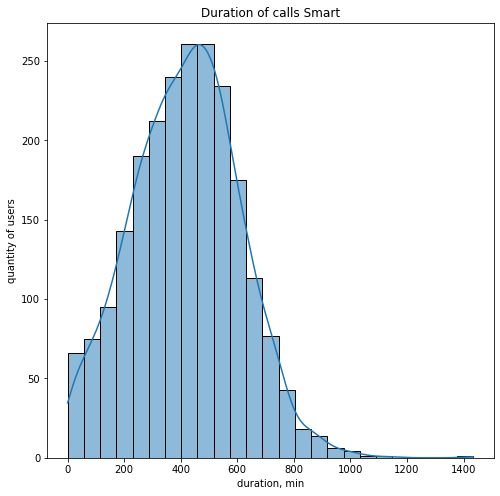

In [106]:
# разбиваем 500 минут пакета на интервалы по 20 минут
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Duration of calls Smart')
ax.set_xlabel('duration, min')
ax.set_ylabel('quantity of users')
sns.histplot(smart, x='duration', bins=25, kde=True)
plt.show()

Насколько видно из графика, продолжительность звонков распределена нормально, основная масса значений лежит в промежутке от 220 до 580 минут в месяц. Очевидно, что максимальное значение 1435 - это выброс. Кажется, этому абоненту стоит задуматься над сменой тарифа))  
Проверим, насколько сильно это значение искажает средний показатель.

In [107]:
smart.query('duration > 1200')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,duration,...,rub_per_gb,rub_per_message,rub_per_minute,calls_over_lim,messages_over_lim,gb_over_lim,calls_revenue,messages_revenue,traffic_revenue,total_revenue
1989,1216,74,NaT,волгоград,рустам,малинин,2018-11-23,smart,12.0,1435.0,...,200,3,3,935.0,14.0,5.0,2805.0,42.0,1000.0,4397.0


Фильтруем редкие значения > 1000 на графике:

In [108]:
smart.query('duration < 1000')['duration'].mean()

415.6050382366172

Среднее, которое получено методом `describe` - 419,06, а без "тонкого хвоста" - 415,6. Разница не настолько значительна, чтобы отфильтровывать эти данные.

In [109]:
smart_calls = smart.pivot_table(index='month', values='duration')
smart_calls.columns = ['calls_mean']
smart_calls

,calls_mean
month,
1.0,203.852941
2.0,298.689655
3.0,390.051948
4.0,367.133929
5.0,387.361702
6.0,395.640244
7.0,408.353234
8.0,421.468085
9.0,428.611538


В среднем в начале года абоненты совершали в два раза меньше звонков, чем в конце. Это может быть связано с ежегодными праздниками и закрытием рабочих задач к концу года, а может, была проведена маркетинговая кампания, которая привлекла больше пользователей (например, могли поменяться условия тарифа).

In [110]:
data.groupby(by='month')['user_id'].count()

month
1.0      43
2.0      82
3.0     114
4.0     167
5.0     208
6.0     248
7.0     292
8.0     342
9.0     375
10.0    417
11.0    450
12.0    478
Name: user_id, dtype: int64

Клиенты действительно приходили в течение года, и количество клиентов увеличивалось, скорее всего дело все-таки в изменении условий тарифа.

Аналогично для сообщений

In [111]:
smart['messages_count'].describe()

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

In [112]:
var_smart_msg = smart['messages_count'].var(ddof=1)
var_smart_msg

796.9552557301104

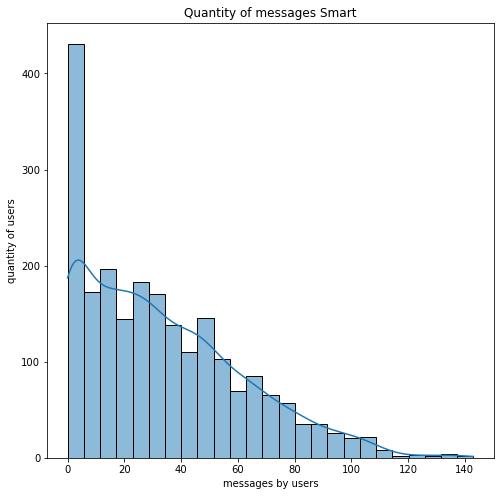

In [113]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Quantity of messages Smart')
ax.set_xlabel('messages by users')
ax.set_ylabel('quantity of users')
msg_hist = sns.histplot(smart['messages_count'], kde=True, bins=25, ax=ax)
plt.show()

In [114]:
smart_messages = smart.pivot_table(index='month', values='messages_count')
smart_messages.columns = ['messages_mean']
smart_messages

,messages_mean
month,
1.0,18.235294
2.0,24.086207
3.0,31.857143
4.0,30.741071
5.0,33.773050
6.0,33.402439
7.0,33.751244
8.0,33.638298
9.0,33.638462


График сильно скошен влево: подавляющее большинство абонентов Smart не используют сообщения вообще. В среднем абоненты используют чуть больше половины пакета сообщений (30), что объяснимо, ведь зачастую удобнее использовать мессенджеры или позвонить.

Траффик:

In [115]:
smart['mb_used'].describe().round()

count     2230.0
mean     16201.0
std       5879.0
min          0.0
25%      12630.0
50%      16505.0
75%      20042.0
max      38552.0
Name: mb_used, dtype: float64

In [116]:
var_smart_traffic = smart['mb_used'].var(ddof=1)
var_smart_traffic

34564843.48129721

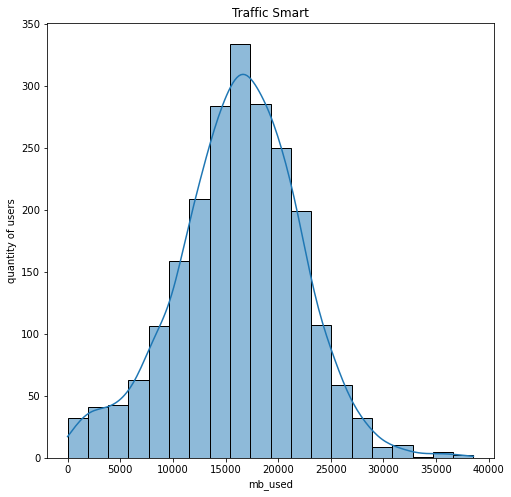

In [117]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Traffic Smart')
ax.set_ylabel('quantity of users')
sns.histplot(smart['mb_used'], kde=True, bins=20)
plt.show()

In [118]:
smart_traffic = smart.pivot_table(index='month', values='mb_used')
smart_traffic.columns = ['traffic_mean']
smart_traffic

,traffic_mean
month,
1.0,8513.717647
2.0,11597.054310
3.0,15104.159091
4.0,13462.180625
5.0,15805.184326
6.0,15794.647988
7.0,15743.150348
8.0,16610.720085
9.0,16303.578808


По всем абонентам виден незначительный перерасход включенного в стоимость пакета интернета, кроме января и февраля. В среднем абоненты тарифа Smart используют 16201 Мб (15 Гб) интернета в месяц, в основной массе им требуется от 12630 Мб (12 Гб) до 20242 Мб (19 Гб). Максимальный расход траффика в этой группе 38552 Мб (37 Гб).

#### Выводы

Итак, для абонентов тарифа Smart:
- Сообщений в классическом понимании пользователи этой группы отправляют немного - в среднем 38 в месяц, что больше половины пакета для этого тарифа;
- Более актуальным является пакет минут. В среднем абоненты используют включенный в стоимость пакет минут практически полностью (419 минут), и примерно четверть перерасходует лимит в течение месяца. Основная масса значений лежит в промежутке от 220 до 580 минут в месяц. При этом есть значительная разница в усредненных данных для начала и конца года: в первые два месяца абоненты использовали до 300 минут;
- Интернет в этом тарифе используется не так активно, вероятно, из-за высокой стоимости. В среднем абоненты используют пакет интернета полностью, либо чуть меньше, чем встроено в тариф. Перерасход траффика в этой группе незначительный и не превышает 3 ГБ.

Дополнительно и из природного любопытства проверим, кому из пользователей можно предложить переход на тариф Ultra или дополнительные пакеты минут и интернета.

Установим условия, исходя из полученных данных:
- перерасход минут больше, чем в два раза;
- перерасход траффика не менее 30 Гб, именно столько входит в тариф Ultra;
- для сообщений не установлены границы, поскольку основная прибыль явно получена от звонков и интернета.

In [119]:
def overrun_calc(row):
    if (row['calls_over_lim'] > 500) or (row['gb_over_lim'] >= 30):
        return 'move'
smart['change_tariff'] = smart.apply(overrun_calc, axis=1)

#создаем список жертв холодного обзвона
list_for_suggestion = smart.query('change_tariff == "move"')[[
    'user_id','first_name','last_name','total_revenue','calls_over_lim','gb_over_lim']]
list_for_suggestion.sort_values(by='total_revenue', ascending=False)

,user_id,first_name,last_name,total_revenue,calls_over_lim,gb_over_lim
3159,1486,матвей,моргунов,6770.0,507.0,23.0
2178,1261,мадина,пантелеева,5672.0,574.0,17.0
1989,1216,рустам,малинин,4397.0,935.0,5.0
2061,1229,нелли,зубкова,4116.0,522.0,10.0
2993,1451,виктория,завьялова,2882.0,644.0,2.0
2441,1319,харитон,парфенов,2665.0,505.0,3.0


Люди любят, когда им предлагают более выгодные условия, и это может повысить их лояльность. При этом они потребляют столько услуг, что общий доход не пострадает. Наверное, а может и нет, но это тема для другого исследования. Это была рекламная пауза, переходим к тарифу Ultra.

### Тариф Ultra

Условия:  
- Ежемесячная плата: 1950 рублей;
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.  

Стоимость услуг сверх тарифного пакета:  
- минута разговора: 1 рубль;
- сообщение: 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.

In [120]:
ultra = data.query('tariff_name == "ultra"')

In [121]:
# получаем количество пользователей
len(ultra['user_id'].unique())

149

In [122]:
ultra['duration'].describe()

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: duration, dtype: float64

In [123]:
var_ultra_calls = ultra['duration'].var(ddof=1)
var_ultra_calls

101052.49354928388

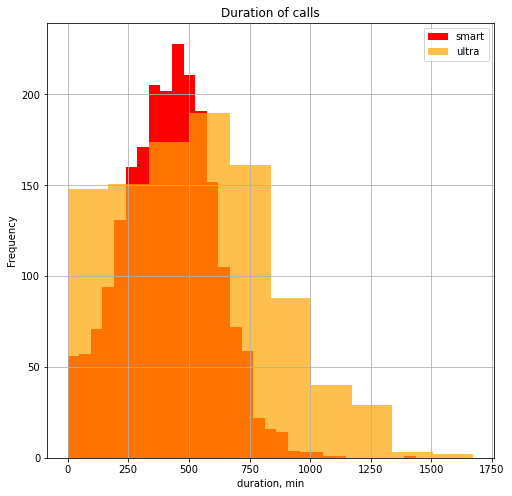

In [124]:
fg,ax = plt.subplots(figsize=(8,8))
ax.set_title('Duration of calls')
ax.set_xlabel('duration, min')
smart['duration'].plot(kind='hist', bins=30, label='smart', color='red', legend=True)
ultra['duration'].plot(kind='hist', ax=ax, label='ultra', color='orange', legend=True, alpha=0.7, grid=True)
plt.show()

Из графика и описания видно, что и в этой группе есть выбивающиеся значения - они лежат за пределами 1300 минут. Проверим, как изменится среднее, если отфильтровать их.

In [125]:
ultra.query('duration < 1300')['duration'].mean()

517.9099283520983

Не критично, 537 против 545 минут, которые используют абоненты Ultra в месяц в среднем.
Распределение для пользователей тарифа Ultra скошено влево - более 800 минут в месяц использует менее четвертой части пользователей, и еще четверть пользуется звонками по минимуму - менее 300 минут в месяц. При этом установленного лимита в 3000 минут не достигает никто. Основная масса абонентов в этой группе использует от 300 до 750 минут в месяц.

In [126]:
ultra_calls = ultra.pivot_table(index='month', values='duration')
ultra_calls.columns = ['calls_mean']
ultra_calls

,calls_mean
month,
1.0,428.111111
2.0,297.125000
3.0,489.648649
4.0,458.018182
5.0,510.328358
6.0,479.702381
7.0,545.791209
8.0,510.775701
9.0,539.443478


В этой группе значения среднего также меньше в первые месяцы года и значительно выше к концу, но разница между ними не такая большая, как для пользователей тарифа Smart.

In [127]:
ultra['messages_count'].describe()

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: messages_count, dtype: float64

In [128]:
var_ultra_msg = ultra['messages_count'].var(ddof=1)
var_ultra_msg

2285.417424655841

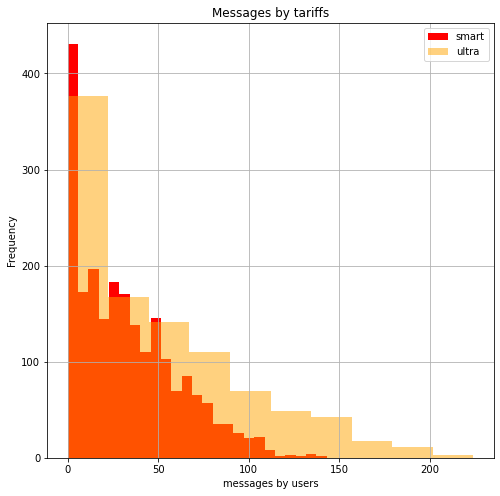

In [129]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Messages by tariffs')
ax.set_xlabel('messages by users')
smart['messages_count'].plot(kind='hist', bins=25, color='red', label='smart', legend=True)
ultra['messages_count'].plot(kind='hist', ax=ax, color='orange', alpha=0.5, grid=True, label='ultra', legend=True)
plt.show()

In [130]:
ultra_messages = ultra.pivot_table(index='month', values='messages_count')
ultra_messages.columns = ['messages_mean']
ultra_messages

,messages_mean
month,
1.0,33.777778
2.0,21.958333
3.0,32.297297
4.0,31.563636
5.0,37.850746
6.0,41.726190
7.0,49.846154
8.0,48.439252
9.0,52.286957


Несмотря на то, что в пакет Ultra включено аж 1000 сообщений, абоненты все равно не используют их, и неудивительно в век интернета. Среднее в этой группе почти не отличается от группы Smart и составляет 39 сообщений в месяц. Основная масса пользователей отправляет до 60 сообщений в месяц.

In [131]:
ultra['mb_used'].describe()

count      986.000000
mean     19449.059970
std      10101.095459
min          0.000000
25%      11748.585000
50%      19304.020000
75%      26835.885000
max      49745.690000
Name: mb_used, dtype: float64

In [132]:
var_ultra_traffic = ultra['mb_used'].var(ddof=1)
var_ultra_traffic

102032129.46482131

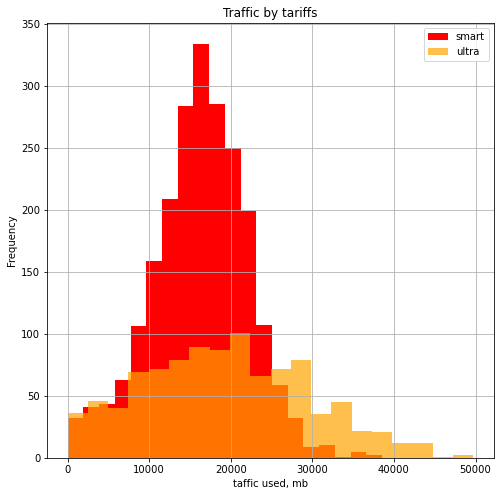

In [133]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Traffic by tariffs')
ax.set_xlabel('taffic used, mb')
smart['mb_used'].plot(kind='hist', bins=20, label='smart', color='red', legend=True)
ultra['mb_used'].plot(kind='hist', bins=20, label='ultra', color='orange', grid=True, alpha=0.7, legend=True)
plt.show()

In [134]:
ultra_traffic = ultra.pivot_table(index='month', values='mb_used')
ultra_traffic.columns = ['traffic_mean']
ultra_traffic.round()

,traffic_mean
month,
1.0,13141.0
2.0,11776.0
3.0,17536.0
4.0,16828.0
5.0,19363.0
6.0,18925.0
7.0,20496.0
8.0,19576.0
9.0,19204.0


Похоже, что есть некое значение Гб интернета, больше которого средний человек не может потребить физически, и значение это - 49 Гб (а в тарифе Smart максимальное было 38).  
В среднем абоненты тарифа Ultra используют в месяц 19449 Мб (19 Гб). В этой группе пользователи также используют меньше траффика, чем входит в пакет, но это неудивительно, потому что включено аж 30 Гб. Основная масса абонентов использует от 11748 Мб (11 Гб) до 26835 Мб (26 Гб).

#### Выводы

В среднем поведение абонентов тарифа Ultra отличается от пользователей тарифа Smart не так значительно, как можно было бы предположить, но разница все же есть.  

- Сообщения по-прежнему самый нелюбимый вид связи среди абонентов: в среднем они отправляют 39 сообщений в месяц, а основная масса отправляет до 60 смс;
- Абоненты тарифа Ultra звонят активнее, в среднем они используют 545 минут в месяц. Более 800 минут в месяц использует менее четвертой части пользователей, и еще четверть пользуется звонками минимально - менее 300 минут в месяц. При этом установленный лимит в 3000 минут в этой группе не превышается. Основная масса абонентов Ultra использует от 300 до 750 минут в месяц;
- В среднем абоненты тарифа Ultra используют в месяц 19 Гб траффика, в основном установленный лимит не превышается.

### Сравнение тарифов

Создадим сводные таблицы со средними показателями для каждого вида услуг и построим общие гистограммы для сравнения выручки.

In [135]:
# для тарифа smart
smart_pivot = smart.pivot_table(
index='month',
values=['duration',
       'messages_count',
       'mb_used',
       'calls_revenue',
       'messages_revenue',
       'traffic_revenue',
       'total_revenue'])

# для тарифа ultra
ultra_pivot = ultra.pivot_table(
index='month',
values=['duration',
       'messages_count',
       'mb_used',
       'calls_revenue',
       'messages_revenue',
       'traffic_revenue',
       'total_revenue'])

In [136]:
smart_pivot.round()

,calls_revenue,duration,mb_used,messages_count,messages_revenue,total_revenue,traffic_revenue
month,,,,,,,
1.0,4.0,204.0,8514.0,18.0,2.0,721.0,165.0
2.0,44.0,299.0,11597.0,24.0,6.0,828.0,228.0
3.0,103.0,390.0,15104.0,32.0,15.0,1165.0,496.0
4.0,81.0,367.0,13462.0,31.0,11.0,963.0,321.0
5.0,83.0,387.0,15805.0,34.0,16.0,1198.0,549.0
6.0,88.0,396.0,15795.0,33.0,17.0,1204.0,549.0
7.0,103.0,408.0,15743.0,34.0,17.0,1224.0,553.0
8.0,122.0,421.0,16611.0,34.0,19.0,1321.0,630.0
9.0,129.0,429.0,16304.0,34.0,17.0,1250.0,554.0


In [137]:
ultra_pivot.round()

,calls_revenue,duration,mb_used,messages_count,messages_revenue,total_revenue,traffic_revenue
month,,,,,,,
1.0,0.0,428.0,13141.0,34.0,0.0,1950.0,0.0
2.0,0.0,297.0,11776.0,22.0,0.0,1975.0,25.0
3.0,0.0,490.0,17536.0,32.0,0.0,2015.0,65.0
4.0,0.0,458.0,16828.0,32.0,0.0,2002.0,52.0
5.0,0.0,510.0,19363.0,38.0,0.0,2060.0,110.0
6.0,0.0,480.0,18925.0,42.0,0.0,2039.0,89.0
7.0,0.0,546.0,20496.0,50.0,0.0,2118.0,168.0
8.0,0.0,511.0,19576.0,48.0,0.0,2083.0,133.0
9.0,0.0,539.0,19204.0,52.0,0.0,2024.0,74.0


Нас интересует общая выручка. Поскольку абоненты тарифа Ultra  не превышают установленные в месяц лимиты по звонкам и сообщениям, дополнительной прибыли по этим категориям нет, и сравнивать нечего.

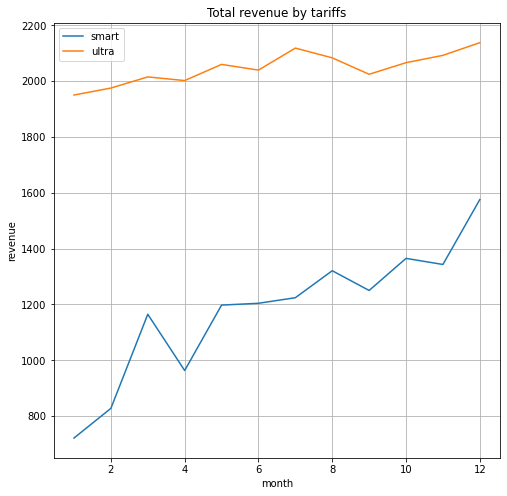

In [138]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Total revenue by tariffs')
ax.set_ylabel('revenue')
ax = smart_pivot['total_revenue'].plot(kind='line', grid=True, label='smart', legend=True)
ultra_pivot['total_revenue'].plot(kind='line', grid=True, ax=ax, label='ultra', legend=True)
plt.show()

Выручка по тарифу Ultra превышает выручку по Smart. Вероятно, на это влияет размер абонентской платы: дополнительная выручка за перерасход услуг по тарифу Smart не перекрывает ее.  
Подавляющую часть дополнительной выручки сверх абонентской платы составляет выручка за счет траффика (а для тарифа Ultra только она). В тарифе Smart стоимость Гб сверх лимита - 3 руб, а в тарифе Ultra - 1 руб, что дает разницу при использовании интернета в обеих группах. К тому же, превысить лимит проще на тарифе Smart при среднем значении в этой группе 16 Гб.

## Проверка гипотез

### Выручка по тарифам

Несмотря на то, что поведение групп пользователей с тарифами Ultra и Smart отличается в количественном выражении меньше, чем ожидалось, разница в выручке между ними все равно должна быть значительной: слишком уж разные условия у тарифов.  
Исходя из проведенного анализа, сформулируем одностороннюю нулевую гипотезу:  
- H0: Средняя выручка по тарифам Smart и Ultra равны.  
В качестве альтернативной гипотезы примем: 
- H1: Выручка по тарифам отличается.  

Примем уровень статистической значимости в 5% и используем статистический тест.

In [139]:
alpha = 0.05
smart_income_mean = smart['total_revenue'].mean() # средний доход по тарифу smart
ultra_income_mean = ultra['total_revenue'].mean() # средний доход по тарифу ultra

smart_result = st.ttest_ind(smart['total_revenue'], ultra['total_revenue'])
print('p-value:', smart_result.pvalue)

if smart_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 8.081909555489933e-161
Отвергаем нулевую гипотезу


In [140]:
print('Средняя выручка по тарифу Smart:', smart_income_mean)
print('Средняя выручка по тарифу Ultra:', ultra_income_mean)
print('Разница в выручке:', (ultra_income_mean - smart_income_mean))

Средняя выручка по тарифу Smart: 1289.6417040358745
Средняя выручка по тарифу Ultra: 2070.030425963489
Разница в выручке: 780.3887219276146


Итак, нулевую гипотезу отвергаем, вместо этого будет работать альтернативная гипотеза - разница в выручке по тарифам велика.  
Разница в 780.39 руб с каждого среднего пользователя может помочь увеличить прибыль оператора, несмотря на то, что тариф Smart использует намного больше абонентов, поэтому тариф Ultra все же приносит больше денег, и вкладывать бюджет нужно именно в него.

### Выручка по регионам

В выборке представлены пользователи из разных регионов. Предположим, что средняя выручка за счет пользователей из Москвы не отличается от выручки за счет пользователей из других регионов. Примем это за нулевую гипотезу.  
Альтернативной гипотезой будет: выручка по Москве отличается значительно от выручки по другим регионам.  
Создадим выборку из пользователей из Москвы и получим количество абонентов.

In [141]:
moscow = data.query('city == "москва"')
len(moscow['user_id'].unique())

99

In [142]:
# проверим, какова вероятность того, что средние выручки по регионам не будут отличаться
# выборки разного размера, принимаем, что дисперсии могут быть не равны
result_mosc = st.ttest_ind(data['total_revenue'], moscow['total_revenue'], equal_var=False)
print('p-value:', result_mosc.pvalue)

p-value: 0.5953544859394873


Очевидно, нулевую гипотезу не отвергаем, вероятность того, что выручки будут отличаться невелика.

In [143]:
print('Средняя выручка по регионам:', data['total_revenue'].mean())
print('Средняя выручка по Москве:', moscow['total_revenue'].mean())
print('Разница в выручке:', 
     (moscow['total_revenue'].mean() - data['total_revenue'].mean()))

Средняя выручка по регионам: 1528.9026741293533
Средняя выручка по Москве: 1546.7135842880523
Разница в выручке: 17.810910158699016


Разницу в 17,81 руб статистика сочла незначительной, и с ней трудно не согласиться. В этом случае работает нулевая гипотеза: разницы в выручке по Москве и другим регионам нет.

## Общий вывод

Итак, в ходе исследования было проверено две основные гипотезы:

- Средняя выручка по тарифам Smart и Ultra равны;  

В результате анализа первую гипотезу отвергаем. Средняя выручка по тарифу Ultra составляет 2070,03 руб, и это больше средней выручки по тарифу Smart, которая составляет 1289,64 руб. Разница составляет 780,39 руб, что при привлечении клиентов на этот тариф может увеличить прибыль компании.
Помимо привлечения новых клиентов, в группе тарифа Smart есть как минимум 7 абонентов, которые  в месяц используют такое же или большее количество услуг, какое предусмотрено тарифом Ultra. Этим пользователям можно предложить переход на тариф Ultra.  

Основную часть выручки сверх абонентской платы приносит использование траффика, на втором месте находятся звонки, но только для тарифа Smart, в группе Ultra установленный лимит звонков в 3000 минут не превышается. Абоненты в обеих группах пишут мало смс-сообщений в месяц, в среднем это 38 и 39 смс в группах Smart и Ultra соответственно. В обоих группах это значение не превышает установленный лимит.  

- Выручка за счет абонентов из Москвы не отличается от выручки абонентов в других регионах.  

Вторую гипотезу отвергаем, альтернативная гипотеза более вероятна: разница в выручке между пользователями из Москвы и других регионов незначительна и составляет 17,81 руб.  
Средняя выручка по регионам: 1528,9
Средняя выручка по Москве: 1546,71


В целом поведение пользователей тарифов Smart и Ultra отличается, хотя и не так значительно, как ожидалось.  

В среднем абоненты тарифа Smart используют включенный в стоимость пакет минут практически полностью (419 минут), и примерно четверть перерасходует лимит в течение месяца. Основная масса значений лежит в промежутке от 220 до 580 минут в месяц.  
Абоненты тарифа Ultra звонят активнее, в среднем они используют 545 минут в месяц. Более 800 минут в месяц использует менее четвертой части пользователей, и еще четверть пользуется звонками минимально - менее 300 минут в месяц. При этом установленный лимит в 3000 минут в этой группе не превышается. Основная масса абонентов Ultra использует от 300 до 750 минут в месяц.  
В обоих группах наблюдается тенденция к уменьшению длительности звонков в первые месяцы года и увеличению длительности ближе к концу, максимальные значения находятся в декабре.  

Использование интернета в группах Smart и Ultra отличается также значительно. 
В среднем абоненты тарифа Smart используют 16201 Мб (15 Гб) интернета в месяц, в основной массе им требуется от 12630 Мб (12 Гб) до 20242 Мб (19 Гб). Максимальный расход траффика в этой группе 38552 Мб (37 Гб).  
По тарифу Smart есть небольшой перерасход пакета траффика, но в среднем он не превышает 3 Гб, абоненты Ultra в основном не превышают лимит. Основная часть абонентов использует в месяц от 12 до 22 Гб интернета, а максимальное значение в этой группе 38 Гб.  
В среднем абоненты тарифа Ultra используют в месяц 19449 Мб (19 Гб). В этой группе пользователи также используют меньше траффика, чем входит в пакет, но это неудивительно, потому что включено аж 30 Гб. Основная масса абонентов использует от 11748 Мб (11 Гб) до 26835 Мб (26 Гб). Максимальное значение в этой группе 49 Гб.  

Количество абонентов тарифа Smart превышает количество абонентов Ultra, и дополнительная прибыль от использования траффика в этой группе выше за счет небольшого пакета и более высокой стоимости за Гб. Но при этом дополнительная прибыль не перекрывает абонентскую плату по тарифу Ultra, а значит, он является более перспективным, и его нужно развивать. 